In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\data\Airbnb\listings_cleaned.csv')
df.head()

,id,name,price,room_type,number_of_reviews,stars,bed,bedroom,bath,neighbourhood,latitude,longitude,minimum_nights,last_review,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,host_id
0,23986,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,150.0,Entire home/apt,26.0,4.64,1.0,1.0,1.0,NAVIGLI,45.44806,9.17373,1.0,2023-07-29,0.18,4.0,1.0,95941
1,40470,Rental unit in Milan · ★4.67 · 2 bedrooms · 4 ...,80.0,Entire home/apt,41.0,4.67,4.0,2.0,1.0,VIALE MONZA,45.52023,9.22747,3.0,2023-09-09,0.26,3.0,2.0,174203
2,304050,Rental unit in Milan · ★4.91 · 1 bedroom · 1 b...,49.0,Private room,264.0,4.91,1.0,1.0,1.0,XXII MARZO,45.45709,9.21531,2.0,2023-11-21,1.92,33.0,2.0,1566887
3,46536,Rental unit in Milan · ★4.53 · 2 bedrooms · 3 ...,110.0,Entire home/apt,35.0,4.53,3.0,2.0,1.0,VIALE MONZA,45.52276,9.22478,3.0,2023-10-30,0.24,5.0,1.0,138683
4,333223,Rental unit in Milano · ★5.0 · 1 bedroom · 2 b...,150.0,Private room,3.0,5.00,2.0,1.0,1.0,MAGENTA - S. VITTORE,45.46097,9.16431,1.0,2023-04-19,0.02,1.0,5.0,1697947


### Handling outliers

#### Reviews Number

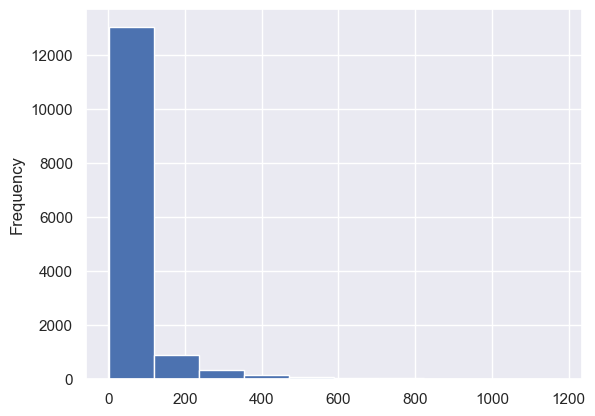

In [3]:
df['number_of_reviews'].plot.hist();

In [4]:
def outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    print(f'Low-Band Outlier: {q1-1.5*iqr}')
    print(f'High-Band Outlier: {q3+1.5*iqr}')
    print('------')
    print(f'Low-Band Extreme Outlier: {q1-3*iqr}')
    print(f'High-Band Extreme Outlier: {q3+3*iqr}')

outliers(df['number_of_reviews'])

Low-Band Outlier: -59.5
High-Band Outlier: 112.5
------
Low-Band Extreme Outlier: -124.0
High-Band Extreme Outlier: 177.0


In [5]:
df.loc[df['number_of_reviews_ltm']>4, 'id'].count()

9332

In [6]:
# I keep just the listings with at least 5 reviews
# in the past 12 months

df = df[df['number_of_reviews_ltm']>4]

#### Price

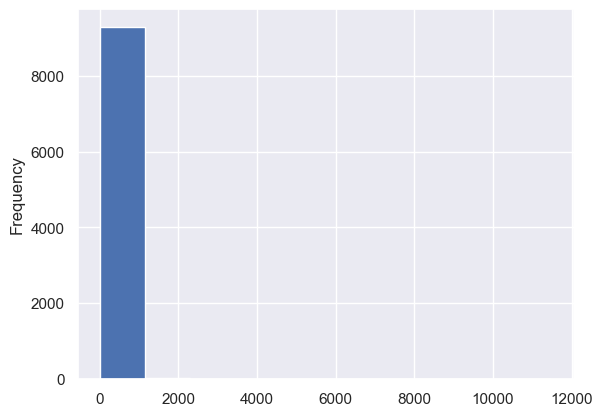

In [7]:
df['price'].plot.hist();

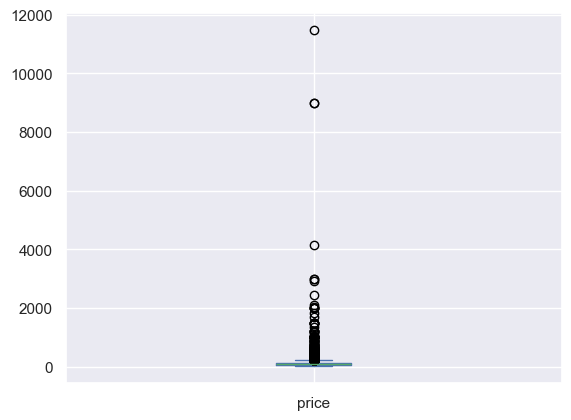

In [8]:
df['price'].plot.box();

In [9]:
outliers(df['price'])

Low-Band Outlier: -17.5
High-Band Outlier: 218.5
------
Low-Band Extreme Outlier: -106.0
High-Band Extreme Outlier: 307.0


In [10]:
# There are no listings that cost too little

df[df['price']<10]['id'].count()

0

In [11]:
# How many rows I'm deleting

df[df['price']>219]['id'].count()

712

In [12]:
# Exlude the outliers

df = df[df['price'] < 219]

In [13]:
# No null col, nice!

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8615 entries, 2 to 14490
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8615 non-null   int64  
 1   name                            8615 non-null   object 
 2   price                           8615 non-null   float64
 3   room_type                       8615 non-null   object 
 4   number_of_reviews               8615 non-null   float64
 5   stars                           8615 non-null   float64
 6   bed                             8615 non-null   float64
 7   bedroom                         8615 non-null   float64
 8   bath                            8615 non-null   float64
 9   neighbourhood                   8615 non-null   object 
 10  latitude                        8615 non-null   float64
 11  longitude                       8615 non-null   float64
 12  minimum_nights                  8615 n

### Bed

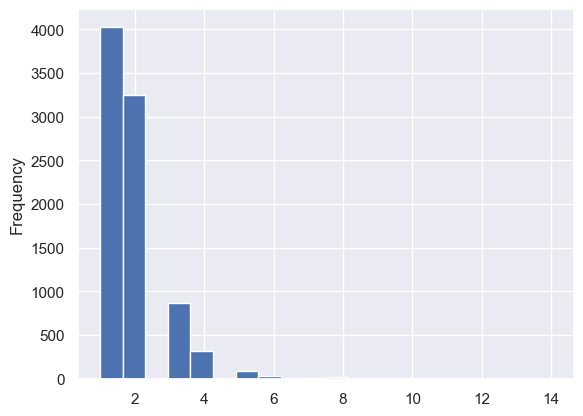

In [14]:
df['bed'].plot.hist(bins=20);

In [15]:
outliers(df['bed'])

Low-Band Outlier: -0.5
High-Band Outlier: 3.5
------
Low-Band Extreme Outlier: -2.0
High-Band Extreme Outlier: 5.0


In [16]:
df[df['bed']>4]['id'].count()

155

In [17]:
df = df[df['bed']<4]

### Bath

Low-Band Outlier: 1.0
High-Band Outlier: 1.0
------
Low-Band Extreme Outlier: 1.0
High-Band Extreme Outlier: 1.0


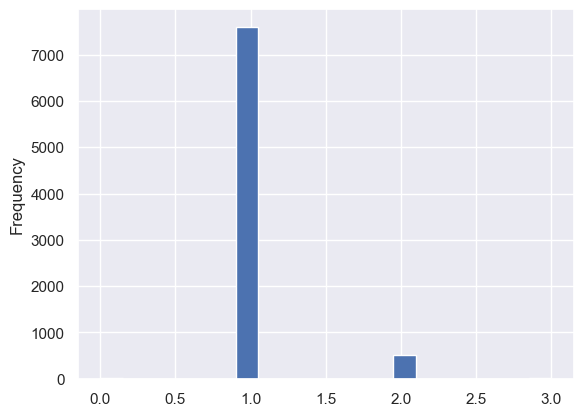

In [18]:
outliers(df['bath'])
df['bath'].plot.hist(bins=20);

In [19]:
# I've decided to keep all the bath values.
# It's not rare for a home to have 2 baths

(df['bath'] > 1).value_counts()

bath
False    7613
True      528
Name: count, dtype: int64

### Bedroom

Low-Band Outlier: 1.0
High-Band Outlier: 1.0
------
Low-Band Extreme Outlier: 1.0
High-Band Extreme Outlier: 1.0


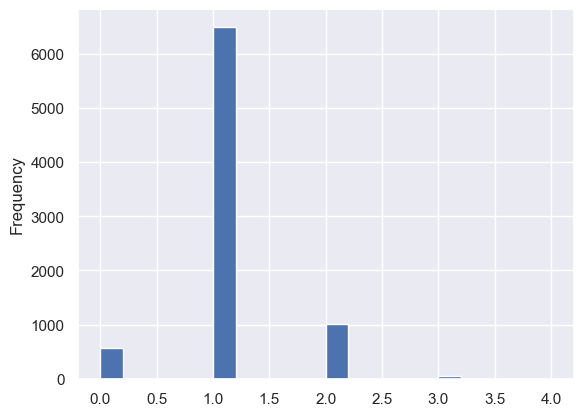

In [20]:
outliers(df['bedroom'])
df['bedroom'].plot.hist(bins=20);

In [22]:
(df['bedroom'] > 2).value_counts()

bedroom
False    8081
True       60
Name: count, dtype: int64

In [23]:
df = df[df['bedroom'] <= 2]

### Data exploration

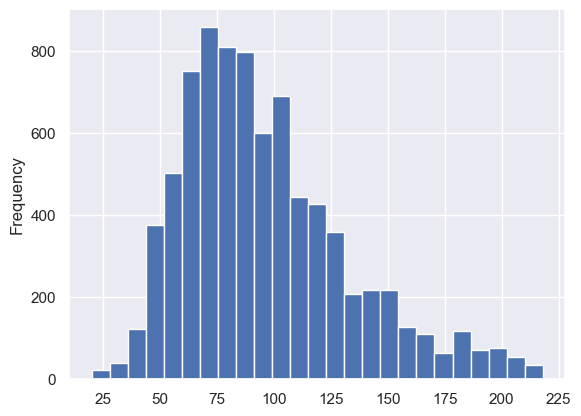

In [24]:
df['price'].plot.hist(bins=25);

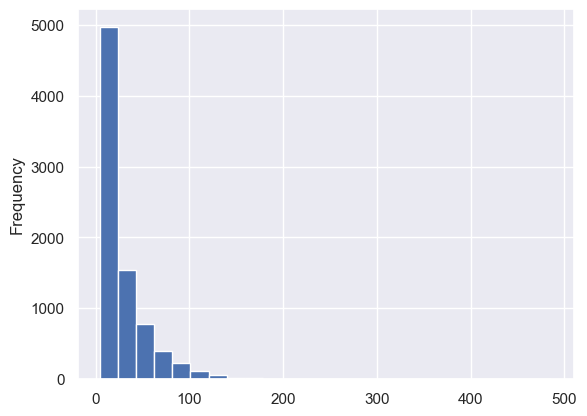

In [25]:
df['number_of_reviews_ltm'].plot.hist(bins=25);

In [28]:
df['minimum_nights'].value_counts()

minimum_nights
1.0    3597
2.0    3251
3.0     752
4.0     219
5.0     111
Name: count, dtype: int64

In [27]:
df = df[df['minimum_nights']<6]

## Revenue in the last 12 Months

There's no enough data to get the true revenue of the last 12 months. But we can get a proxy with this formula:

*4.2 * number_of_reviews_ltm * price*

The average number of nights per Airbnb booking in "Europe, Middle East, and Africa" in 2022 is 4.2.

[Source](https://www.statista.com/statistics/1193597/airbnb-average-nights-per-booking-by-region-worldwide/)

This is the best proxy based on the available data.

In [29]:
df['multiply'] = 4.2
df.loc[df['minimum_nights']==5, 'multiply'] = 5

In [30]:
df['revenue_ltm'] = df['multiply'] * df['number_of_reviews_ltm'] * df['price']

df.head()

,id,name,price,room_type,number_of_reviews,stars,bed,bedroom,bath,neighbourhood,latitude,longitude,minimum_nights,last_review,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,host_id,multiply,revenue_ltm
2,304050,Rental unit in Milan · ★4.91 · 1 bedroom · 1 b...,49.0,Private room,264.0,4.91,1.0,1.0,1.0,XXII MARZO,45.457090,9.215310,2.0,2023-11-21,1.92,33.0,2.0,1566887,4.2,6791.4
3,46536,Rental unit in Milan · ★4.53 · 2 bedrooms · 3 ...,110.0,Entire home/apt,35.0,4.53,3.0,2.0,1.0,VIALE MONZA,45.522760,9.224780,3.0,2023-10-30,0.24,5.0,1.0,138683,4.2,2310.0
9,84741,Loft in Milan · ★4.63 · 1 bedroom · 1 bed · 1 ...,39.0,Private room,569.0,4.63,1.0,1.0,1.0,PARCO FORLANINI - ORTICA,45.469994,9.244106,1.0,2023-12-18,3.71,52.0,2.0,443989,4.2,8517.6
11,348448,Rental unit in Milan · ★4.54 · Studio · 1 bed ...,99.0,Entire home/apt,137.0,4.54,1.0,0.0,1.0,BRERA,45.476170,9.188730,1.0,2023-11-26,1.00,38.0,1.0,326090,4.2,15800.4
12,90830,Loft in Milan · ★4.67 · 2 bedrooms · 3 beds · ...,91.0,Entire home/apt,186.0,4.67,3.0,2.0,1.0,NAVIGLI,45.446780,9.163470,1.0,2023-11-27,1.20,67.0,22.0,181255620,4.2,25607.4


### One-Hot Encoding

In [33]:
df['room_type'].value_counts()

room_type
Entire home/apt    6942
Private room        950
Name: count, dtype: int64

In [32]:
# Drop the occurrences of Hotel room and Shared room

df = df[(df['room_type'] != 'Hotel room')&(df['room_type'] != 'Shared room')]

In [34]:
# Entire home/apt = 1
# Private room = 0

df['room'] = 1
df.loc[df['room_type']=='Private room','room'] = 0

#### Delete the 'neighbourhood' with too few occurrences

In [36]:
neigh_count = df['neighbourhood'].value_counts()
neigh_count[5:10]

neighbourhood
NAVIGLI       344
TICINESE      331
BRERA         311
ISOLA         290
XXII MARZO    215
Name: count, dtype: int64

In [39]:
# Check to see how many columns I'm deleting

print(neigh_count[neigh_count<50].count())
print(neigh_count[neigh_count>50].count())

38
42


In [40]:
neigh_count = neigh_count[neigh_count>50]

# I delete the listings that aren't in our considered neighbourhoods
df = df[df['neighbourhood'].isin(neigh_count.index.to_list())]

In [43]:
# One hot encoding 'neighbourhood'

df = pd.concat([df,
           pd.get_dummies(df['neighbourhood'], dtype='float64')],
           axis='columns')

### Linear Regression

In [52]:
# I delete the last one-hot encoded to avoid Multicollinearity
neig_to_keep = neigh_count.index.to_list()[:-1]

col_to_keep = ['price','stars','bed','bedroom','bath','room','minimum_nights'] + neig_to_keep

# I'm shuffling the dataframe... otherwise, when I do cross_val_score
# I can't be that sure that the model see all the neighbourhood
df = df.sample(frac=1).reset_index(drop=True)

X = df[col_to_keep]
y = df['revenue_ltm']

In [53]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

lm = LinearRegression()
lm.fit(X,y)

yhat = lm.predict(X)
print('R2: ', metrics.r2_score(y, yhat))
print('MSE: ', metrics.mean_squared_error(y, yhat))

R2:  0.1713053475533829
MSE:  104762373.41773067


In [54]:
# Standardizing the features doesn't change anything
# so I comment out this cell

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Fit the linear regression model on the standardized data
# model = LinearRegression()
# model.fit(X_scaled, y)

# yhat = model.predict(X_scaled)
# print('R2: ', metrics.r2_score(y, yhat))
# print('MSE: ', metrics.mean_squared_error(y, yhat))

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

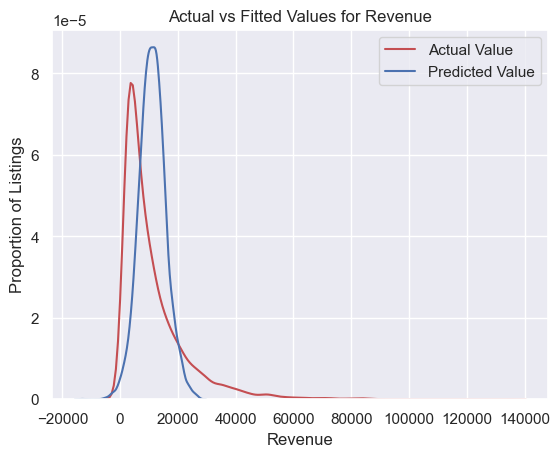

In [55]:
# ax1 = sns.displot(y, hist=False, color="r", label="Actual Value")
# sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Revenue')
plt.xlabel('Revenue')
plt.ylabel('Proportion of Listings')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()


In [56]:
coefficients = lm.coef_

coefficients_dict = dict(zip(col_to_keep, coefficients))

df_coeff = pd.DataFrame(coefficients_dict, index=['coefficients']).T

In [57]:
df_coeff.sort_values(ascending=False, by='coefficients')

,coefficients
DUOMO,11811.292776
stars,8430.176328
BRERA,8076.990985
CENTRALE,7973.277408
MAGENTA - S. VITTORE,6838.491557
TICINESE,6495.268819
PAGANO,5660.502954
BUENOS AIRES - VENEZIA,5657.931199
GUASTALLA,5584.647344
MACIACHINI - MAGGIOLINA,5432.769412


### Polynomial Regression

In [60]:
# I try to fit the PolyFeatures just to 'price'
# It's normal that after a poin, increasing the price will decrease the revenue

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=2)

X_price2 = X.copy()
X_price2['price'] = poly.fit_transform(X_price2[['price']])

lr = LinearRegression()

print(cross_val_score(lr,X_price2,y, cv=5, scoring='r2'))
print(cross_val_score(lr,X,y, cv=5, scoring='r2'))
print()
print(cross_val_score(lr,X_price2,y, cv=5, scoring='r2').mean())
print(cross_val_score(lr,X,y, cv=5, scoring='r2').mean())

[0.16739764 0.13941034 0.16440672 0.15991487 0.1344175 ]
[0.17262261 0.14555314 0.17181549 0.17036958 0.14807458]

0.15310941360526023
0.1616870774013891
